In [60]:
from matplotlib import pyplot as plt
import numpy as np
from time import time
from os.path import abspath, join
import sys
from glob import glob
import vaex
from hammer import dm
root_dir = abspath(join('..', '..'))
data_dir = join(root_dir, 'Data')
sys.path.append(root_dir)
from utils import (plot_corner, plot_chain, plot_fit, style, calculate_probs, get_params)

# 2 comp

In [46]:
style()

In [47]:
zfiles = glob(join(data_dir, 'MCMC', 'dm_mock', 'mock', 'z', 'z*.hdf5'))
zfiles.sort()
wfiles = glob(join(data_dir, 'MCMC', 'dm_mock', 'mock', 'z', 'w*.hdf5'))
wfiles.sort()
zfiles, wfiles

(['/home2/s20321005/Thesis-Project/Data/MCMC/dm_mock/mock/z/z_1.0.hdf5',
  '/home2/s20321005/Thesis-Project/Data/MCMC/dm_mock/mock/z/z_1.5.hdf5',
  '/home2/s20321005/Thesis-Project/Data/MCMC/dm_mock/mock/z/z_2.0.hdf5',
  '/home2/s20321005/Thesis-Project/Data/MCMC/dm_mock/mock/z/z_2.5.hdf5',
  '/home2/s20321005/Thesis-Project/Data/MCMC/dm_mock/mock/z/z_3.0.hdf5'],
 ['/home2/s20321005/Thesis-Project/Data/MCMC/dm_mock/mock/z/w_1.0.hdf5',
  '/home2/s20321005/Thesis-Project/Data/MCMC/dm_mock/mock/z/w_1.5.hdf5',
  '/home2/s20321005/Thesis-Project/Data/MCMC/dm_mock/mock/z/w_2.0.hdf5',
  '/home2/s20321005/Thesis-Project/Data/MCMC/dm_mock/mock/z/w_2.5.hdf5',
  '/home2/s20321005/Thesis-Project/Data/MCMC/dm_mock/mock/z/w_3.0.hdf5'])

In [48]:
index = 0
zfile = zfiles[index]
wfile = wfiles[index]
zdata = vaex.open(zfile)

zmid = zdata['zmid'].to_numpy()
znum = zdata['znum'].to_numpy()
zerr = zdata['zerr'].to_numpy()

wdata = vaex.open(wfile)

wmid = wdata['wmid'].to_numpy()
wnum = wdata['wnum'].to_numpy()
werr = wdata['werr'].to_numpy()

zdata = (zmid, znum, zerr)
wdata = (wmid, wnum, werr)

In [49]:
rhob = [
    0.0104, 0.0277, 0.0073, 0.0005, 0.0006, 0.0018,
    0.0018, 0.0029, 0.0072, 0.0216, 0.0056, 0.0015
]
sigmaz = [
    3.7, 7.1, 22.1, 39.0, 15.5, 7.5, 12.0, 
    18.0, 18.5, 18.5, 20.0, 20.0]
rhoDM = [0.016]
log_nu0 = [0]
R = [3.4E-3]
zsun = [5]
w0 = [-7.]
log_sigmaw1 = [np.log(5.)]
log_a1 = [np.log(0.4)]
log_sigmaw2 = [np.log(10.)]
log_a2 = [np.log(0.1)]

theta = np.array([rhob + sigmaz + rhoDM + log_nu0 + R + zsun+w0 + log_sigmaw1 + log_a1 + log_sigmaw2 + log_a2]).flatten()
theta.shape

(33,)

In [50]:
locs = dict(
    rhoDM=-0.05,
    log_nu0=-1,
    R=3.4E-3,
    zsun=-50,
    w0=-15,
    log_sigmaw1=np.log(1),
    log_a1=np.log(0.05),
    log_sigmaw2=np.log(1),
    log_a2=np.log(0.05),
)

scales = dict(
    rhoDM=0.15,
    log_nu0=3,
    R=0.6E-3,
    zsun=100,
    w0=15,
    log_sigmaw1=np.log(25)-locs['log_sigmaw1'],
    log_a1=np.log(2)-locs['log_a1'],
    log_sigmaw2=np.log(25)-locs['log_sigmaw2'],
    log_a2=np.log(2)-locs['log_a2'],
)

keys = list(locs.keys())
locs = np.array(list(locs.values()))
scales = np.array(list(scales.values()))

[(k, loc, th, s+loc) for k, loc, th, s in zip(keys, locs, theta[24:], scales)]

[('rhoDM', -0.05, 0.016, 0.09999999999999999),
 ('log_nu0', -1.0, 0.0, 2.0),
 ('R', 0.0034, 0.0034, 0.004),
 ('zsun', -50.0, 5.0, 50.0),
 ('w0', -15.0, -7.0, 0.0),
 ('log_sigmaw1', 0.0, 1.6094379124341003, 3.2188758248682006),
 ('log_a1', -2.995732273553991, -0.916290731874155, 0.6931471805599454),
 ('log_sigmaw2', 0.0, 2.302585092994046, 3.2188758248682006),
 ('log_a2', -2.995732273553991, -2.3025850929940455, 0.6931471805599454)]

In [51]:
ndim = len(locs)+24
nwalkers = 2*ndim+2
ndim, nwalkers

(33, 68)

In [52]:
p0 = dm.generate_p0(nwalkers, locs, scales, kind=2)
p0.shape

(68, 33)

In [53]:
for p in p0:
    print(dm.log_prob(p, zdata, wdata, locs, scales))

(47.878603980169444, 58.368047568929576)
(49.1098396542307, -1701.7700293752537)
(43.24235717903917, -1448.3581528323944)
(43.1438167326716, -8112.903970532092)
(40.54463088921782, -19913.433753213918)
(44.366078165192484, -298.8237354690169)
(42.9164877224002, -11852.641342209923)
(46.70043361119323, -28.587586681268675)
(47.27111719183338, -4753.3941208103415)
(43.025153862191424, -4489.891970576809)
(47.179148176586146, -2485.028155607673)
(41.56582682328785, -29866.60901356899)
(46.55481763883186, -13643.395511001023)
(47.399356149682475, -20205.46260878016)
(49.02183235039282, -271.7229478171337)
(43.79681565038107, -12671.749283522811)
(42.06835340014593, -1806.478729894683)
(50.84571502308893, -1168.1568467040124)
(47.24447275275394, -3808.2834074164934)
(46.55329563860555, -5151.841671784529)
(44.211002015503084, -85.39210444838716)
(37.047805303673734, -501.91246046422657)
(46.62139404243818, -2317.400833872743)
(49.810056103878104, -4003.8293306578685)
(48.91854694937182, -10

In [54]:
p0_flat = p0.reshape(-1, ndim)
dm.log_prob_par(p0_flat, zdata, wdata, locs, scales)

array([[ 4.78786040e+01,  1.04894436e+01,  5.83680476e+01],
       [ 4.91098397e+01, -1.75087987e+03, -1.70177003e+03],
       [ 4.32423572e+01, -1.49160051e+03, -1.44835815e+03],
       [ 4.31438167e+01, -8.15604779e+03, -8.11290397e+03],
       [ 4.05446309e+01, -1.99539784e+04, -1.99134338e+04],
       [ 4.43660782e+01, -3.43189814e+02, -2.98823735e+02],
       [ 4.29164877e+01, -1.18955578e+04, -1.18526413e+04],
       [ 4.67004336e+01, -7.52880203e+01, -2.85875867e+01],
       [ 4.72711172e+01, -4.80066524e+03, -4.75339412e+03],
       [ 4.30251539e+01, -4.53291712e+03, -4.48989197e+03],
       [ 4.71791482e+01, -2.53220730e+03, -2.48502816e+03],
       [ 4.15658268e+01, -2.99081748e+04, -2.98666090e+04],
       [ 4.65548176e+01, -1.36899503e+04, -1.36433955e+04],
       [ 4.73993561e+01, -2.02528620e+04, -2.02054626e+04],
       [ 4.90218324e+01, -3.20744780e+02, -2.71722948e+02],
       [ 4.37968157e+01, -1.27155461e+04, -1.26717493e+04],
       [ 4.20683534e+01, -1.84854708e+03

(33,)


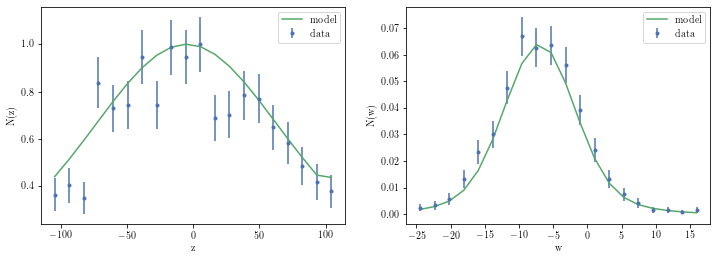

(56.52846920411638, 159.0307887428682)

In [55]:
print(theta.shape)
zmod = dm.fz(zmid, theta)
wmod = dm.fw(wmid, theta)

# plot
fig, ax = plt.subplots(1, 2, figsize=(12, 4))
ax[0].errorbar(zmid, znum, yerr=zerr, fmt='.', label='data')
ax[0].plot(zmid, zmod, label='model')
ax[0].set_xlabel('z')
ax[0].set_ylabel('N(z)')
ax[0].legend()
ax[1].errorbar(wmid, wnum, yerr=werr, fmt='.', label='data')
ax[1].plot(wmid, wmod, label='model')
ax[1].set_xlabel('w')
ax[1].set_ylabel('N(w)')
ax[1].legend()
plt.show()
dm.log_prob(theta, zdata, wdata, locs, scales)

In [56]:
t0 = time()
chain = dm.mcmc(500, nwalkers, p0, zdata, wdata, locs, scales, dz=1, verbose=True, parallel=True)
print(time() - t0, "s")
chain.shape

9.701832294464111 s


(500, 68, 33)

In [57]:
# test calculate_probs
calculate_probs(dm, chain, ndim, zdata, wdata, locs, scales, batch=100)

array([[   47.87860398,    10.48944359,    58.36804757],
       [   51.56264987,  -802.13637848,  -750.57372862],
       [   42.00890681, -1457.79440678, -1415.78549997],
       ...,
       [   43.33424008,   100.14717511,   143.48141519],
       [   38.51945842,   105.00353689,   143.52299531],
       [   42.91252426,   112.65473691,   155.56726117]])

100%|██████████| 10/10 [00:00<00:00, 24.08it/s]


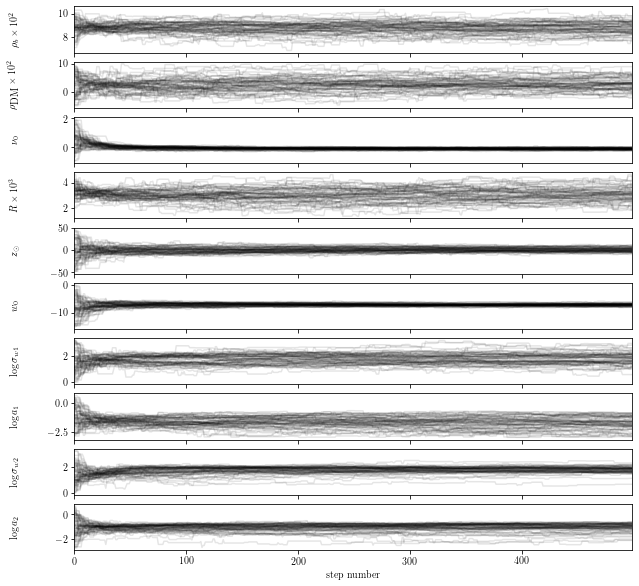

In [58]:
labels = [r'$\rho_b\times 10^2$', r'$\rho_{\textup{DM}}\times 10^2$', r'$\nu_0$', r'$R\times 10^3$', r'$z_{\odot}$', r'$w_0$', r'$\log \sigma_{w1}$', r'$\log a_1$', r'$\log \sigma_{w2}$', r'$\log a_2$']
labs = ['rhob', 'rhoDM', 'nu0', 'R', 'zsun', 'w0', 'log_sigmaw1', 'log_a1', 'log_sigmaw2', 'log_a2']
indexes = [12, 24, 25, 26, 27, 28, 29, 30, 31, 32]

params = get_params(chain, indexes, labs)
plot_chain(params, labels, figsize=(10,10))

In [59]:
p0_next = chain[-1, :, :]
t0 = time()
chain = dm.mcmc(2000, nwalkers, p0_next, zdata, wdata, locs, scales, dz=1, verbose=True, parallel=True)
print(time() - t0, "s")
chain.shape

39.10916447639465 s


(2000, 68, 33)

100%|██████████| 10/10 [00:00<00:00, 21.74it/s]


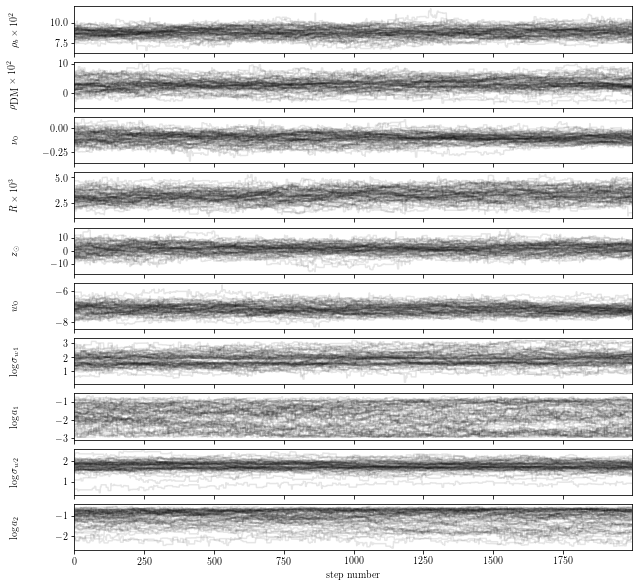

In [61]:
labels = [r'$\rho_b\times 10^2$', r'$\rho_{\textup{DM}}\times 10^2$', r'$\nu_0$', r'$R\times 10^3$', r'$z_{\odot}$', r'$w_0$', r'$\log \sigma_{w1}$', r'$\log a_1$', r'$\log \sigma_{w2}$', r'$\log a_2$']
labs = ['rhob', 'rhoDM', 'nu0', 'R', 'zsun', 'w0', 'log_sigmaw1', 'log_a1', 'log_sigmaw2', 'log_a2']
indexes = [12, 24, 25, 26, 27, 28, 29, 30, 31, 32]

params = get_params(chain, indexes, labs)
plot_chain(params, labels, figsize=(10,10))

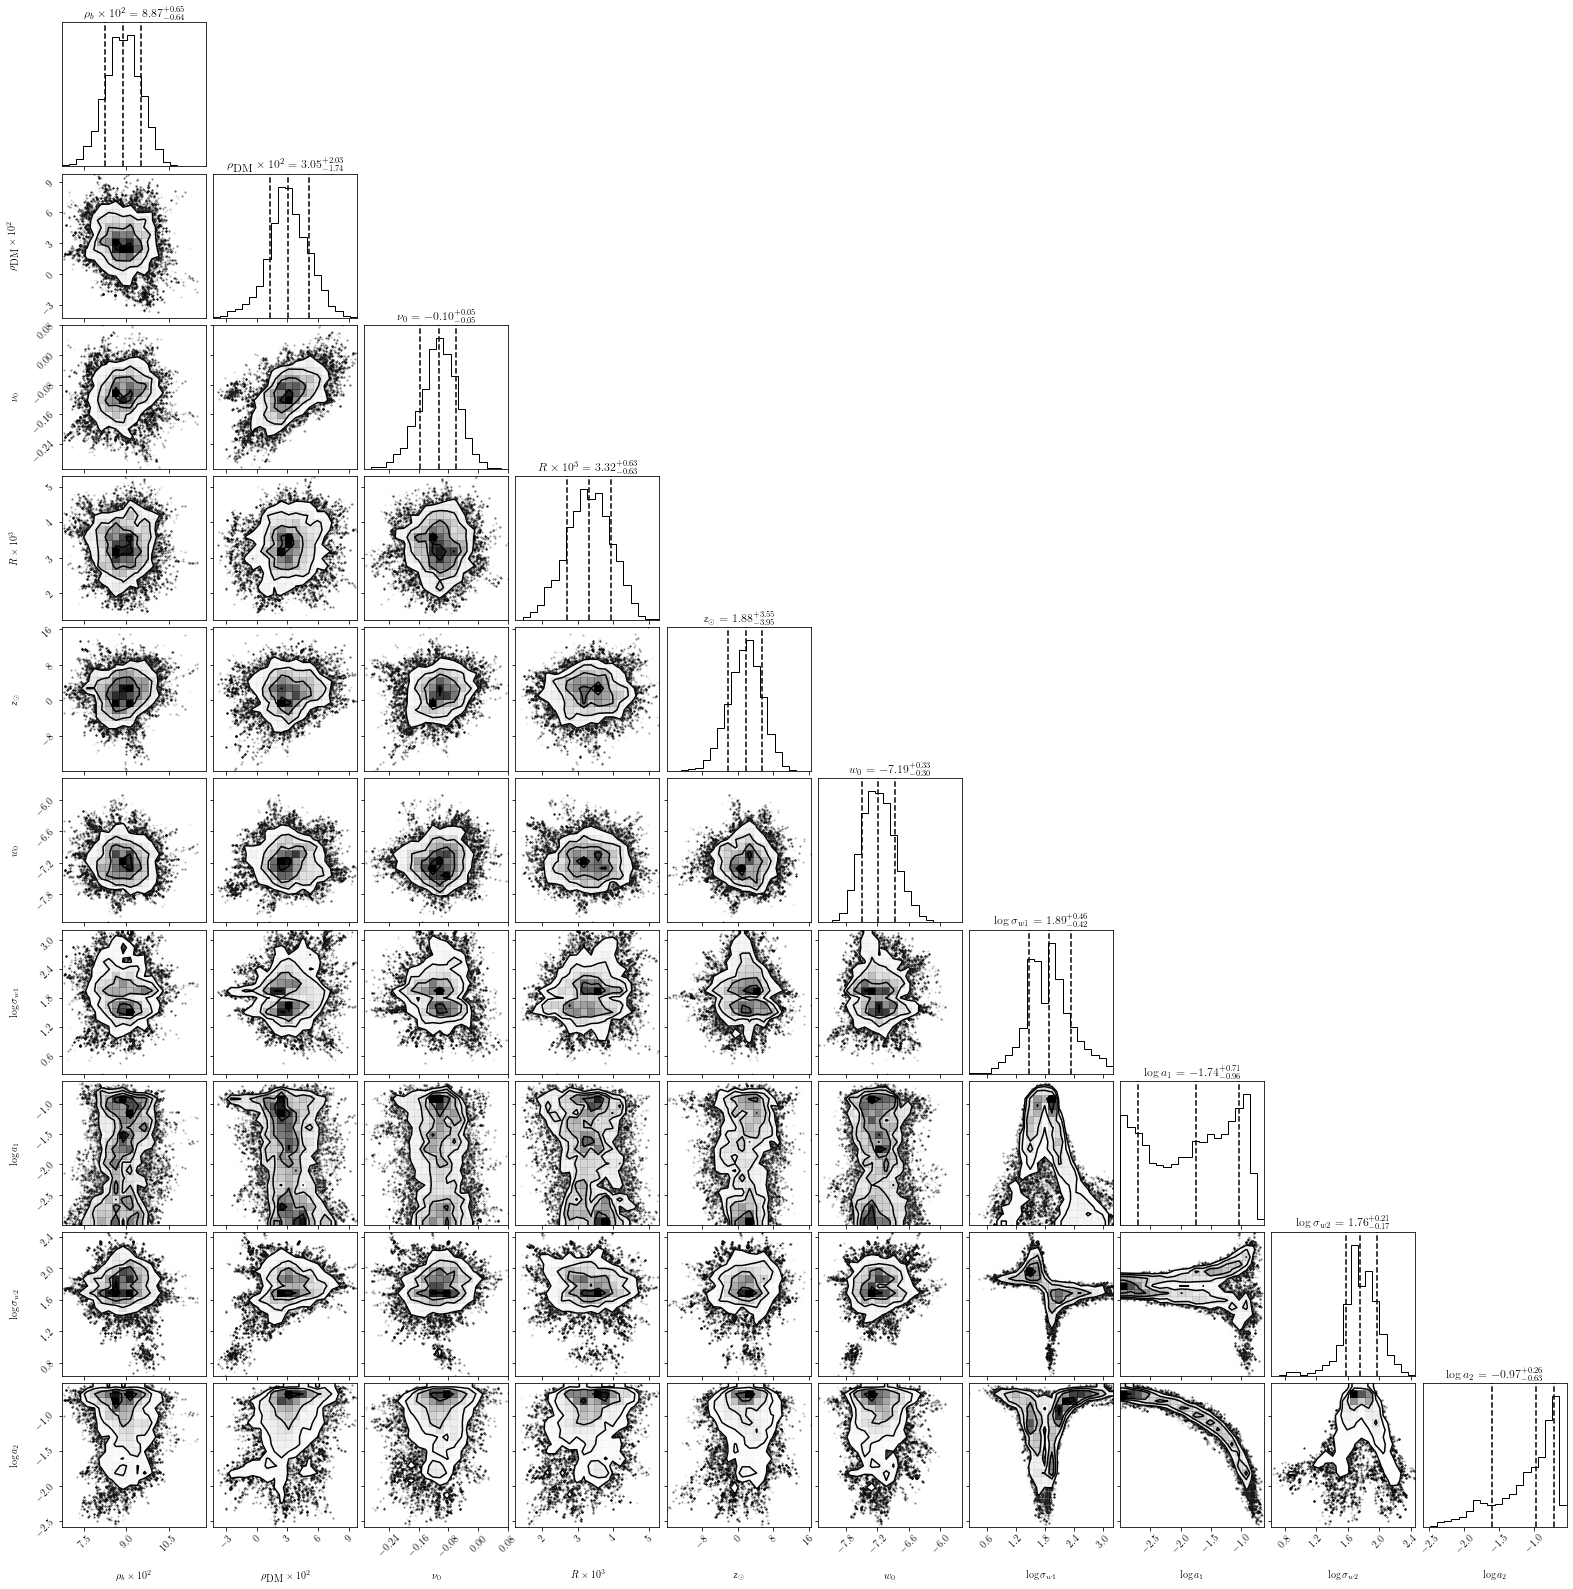

In [62]:
plot_corner(params, labels)

(136000, 33)


100%|██████████| 50000/50000 [00:41<00:00, 1200.85it/s]


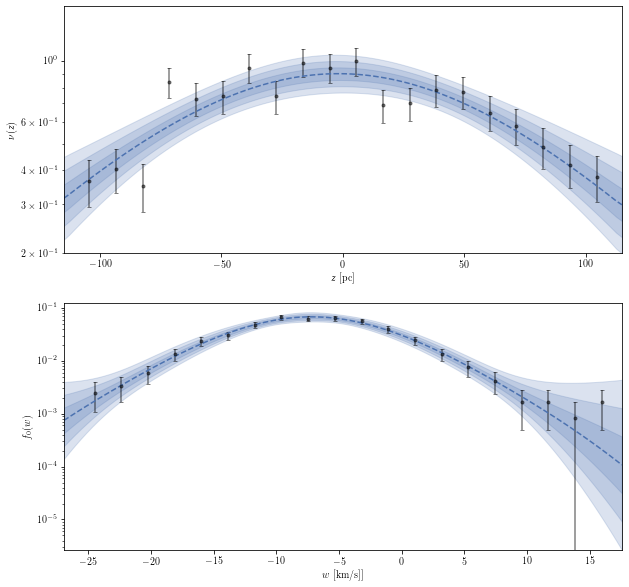

In [63]:
plot_fit(dm, zdata, wdata, chain, ndim)

In [64]:
probs = calculate_probs(dm, chain, ndim, zdata, wdata, locs, scales)

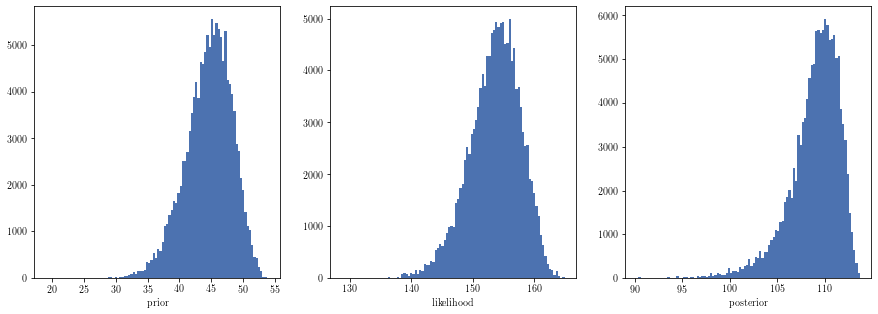

164.89348064350983

In [65]:
prior = probs[:, 0]
likelihood = probs[:, 2]
posterior = probs[:, 1]
# plot histogram of probabilities
fig, axes = plt.subplots(1, 3, figsize=(15, 5))
axes[0].hist(prior, bins=100)
axes[0].set_xlabel('prior')
axes[1].hist(likelihood, bins=100)
axes[1].set_xlabel('likelihood')
axes[2].hist(posterior, bins=100)
axes[2].set_xlabel('posterior')
plt.show()
likelihood.max()

# educated initial guess!?!

In [8]:
locs = dict(
    rhoDM=-0.05,
    log_nu0=-5,
    R=3.4E-3,
    zsun=-50,
    w0=-15,
    log_sigmaw1=-3,
    log_a1=-5,
    log_sigmaw2=-3,
    log_a2=-5,
)

scales = dict(
    rhoDM=0.15,
    log_nu0=15,
    R=0.6E-3,
    zsun=100,
    w0=15,
    log_sigmaw1=8,
    log_a1=10,
    log_sigmaw2=8,
    log_a2=10
)

keys = list(locs.keys())
locs = np.array(list(locs.values()))
scales = np.array(list(scales.values()))

[(k, loc, th, s+loc) for k, loc, th, s in zip(keys, locs, theta[24:], scales)]

[('rhoDM', -0.05, 0.016, 0.09999999999999999),
 ('log_nu0', -5.0, 0.7, 10.0),
 ('R', 0.0034, 0.0034, 0.004),
 ('zsun', -50.0, 5.0, 50.0),
 ('w0', -15.0, -7.0, 0.0),
 ('log_sigmaw1', -3.0, 1.6094379124341003, 5.0),
 ('log_a1', -5.0, -0.2231435513142097, 5.0),
 ('log_sigmaw2', -3.0, 2.302585092994046, 5.0),
 ('log_a2', -5.0, -1.6094379124341003, 5.0)]

In [9]:
p0 = dm.generate_p0(nwalkers, locs, scales, kind=2)
p0.shape

(68, 33)

In [11]:
t0 = time()
chain = dm.mcmc(1000, nwalkers, p0, zdata, wdata, locs, scales, dz=1, verbose=True, parallel=True)
print(time() - t0, "s")
chain.shape

7.765899181365967 s


(1000, 68, 33)

(500, 68, 10)


100%|██████████| 10/10 [00:00<00:00, 41.29it/s]


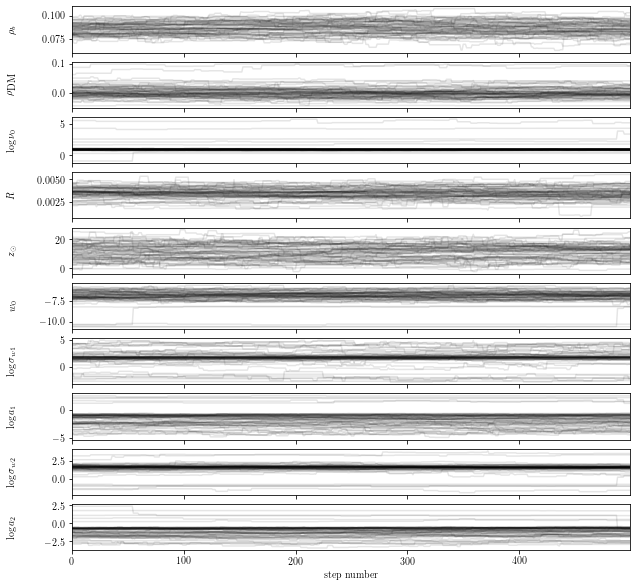

In [12]:
burn = 500
rhob = chain[burn:, :, :12].sum(axis=2).T
rhoDM = chain[burn:, :, 24].T
nu0 = chain[burn:, :, 25].T
R = chain[burn:, :, 26].T
zsun = chain[burn:, :, 27].T
w0 = chain[burn:, :, 28].T
log_sigmaw1 = chain[burn:, :, 29].T
log_a1 = chain[burn:, :, 30].T
log_sigmaw2 = chain[burn:, :, 31].T
log_a2 = chain[burn:, :, 32].T

params = np.array([rhob, rhoDM, nu0, R, zsun, w0, log_sigmaw1, log_a1, log_sigmaw2, log_a2]).T
print(params.shape)
labels = [r'$\rho_b$',r'$\rho_{\textup{DM}}$', r'$\log \nu_0$', r'$R$', r'$z_{\odot}$', r'$w_0$', r'$\log \sigma_{w1}$', r'$\log a_1$', r'$\log \sigma_{w2}$', r'$\log a_2$']
plot_chain(params, labels, figsize=(10,10))

### Experiment on the components distribution

#### 1. rhob

100%|██████████| 100/100 [00:00<00:00, 7463.31it/s]


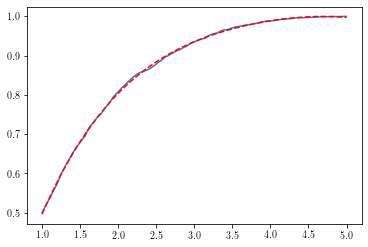

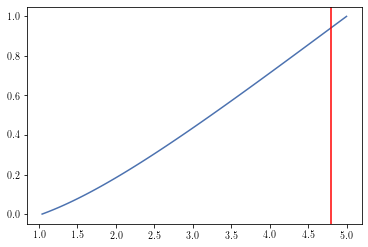

4.7979797979797985


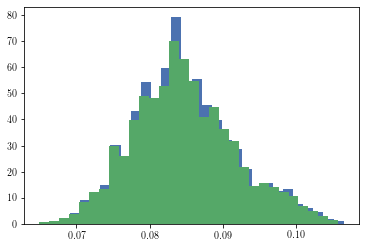

In [66]:
from scipy.stats import median_abs_deviation as mad
from tqdm import tqdm
from scipy.integrate import simps

flat_raw = rhob.reshape(-1)
mad_v = mad(flat_raw)
median_v = np.median(flat_raw)

num = []
mul = np.linspace(1, 5, 100)
total = len(flat_raw)
for i in tqdm(mul):
    mask = np.abs(flat_raw - median_v) < i*mad_v
    num.append(len(flat_raw[mask]))
num = np.array(num)
ydif = np.diff(num)/total
ydif /= ydif[0]
# plot
plt.plot(mul, num/total)
# fit polinomial polyvit
p = np.polyfit(mul, num/total, 4)
plt.plot(mul, np.polyval(p, mul), '--', c='r')
plt.show()

y = np.polyval(p, mul)
areas = []
for i in range(len(y)-1):
    areas.append(simps(y[:i+1], mul[:i+1]))
areas = np.array(areas)
max_areas = areas.max()
areas /= max_areas
# find the value of mul that gives the 95% of the area
m95 = mul[np.argmin(np.abs(areas - 0.95))]
# plot areas
plt.plot(mul[1:], areas)
plt.axvline(m95, c='r')
plt.show()
print(m95)

mask = np.abs(flat_raw - median_v) < m95*mad_v
flat = flat_raw[mask]
plt.hist(flat_raw, bins=30, density=True)
plt.hist(flat, bins=30, density=True)
plt.show()

#### 2. rhoDM

100%|██████████| 100/100 [00:00<00:00, 7491.30it/s]


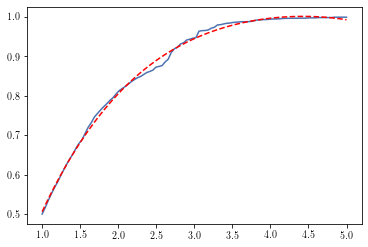

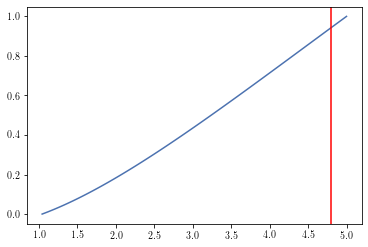

4.7979797979797985


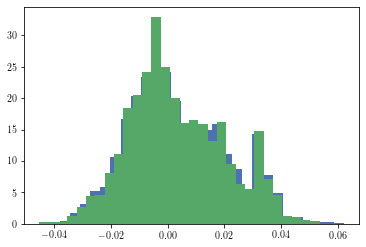

In [67]:
flat_raw = rhoDM.reshape(-1)
mad_v = mad(flat_raw)
median_v = np.median(flat_raw)

num = []
mul = np.linspace(1, 5, 100)
total = len(flat_raw)
for i in tqdm(mul):
    mask = np.abs(flat_raw - median_v) < i*mad_v
    num.append(len(flat_raw[mask]))
num = np.array(num)
ydif = np.diff(num)/total
ydif /= ydif[0]
# plot
plt.plot(mul, num/total)
# fit polinomial polyvit
p = np.polyfit(mul, num/total, 4)
plt.plot(mul, np.polyval(p, mul), '--', c='r')
plt.show()

y = np.polyval(p, mul)
areas = []
for i in range(len(y)-1):
    areas.append(simps(y[:i+1], mul[:i+1]))
areas = np.array(areas)
max_areas = areas.max()
areas /= max_areas
# find the value of mul that gives the 95% of the area
m95 = mul[np.argmin(np.abs(areas - 0.95))]
# plot areas
plt.plot(mul[1:], areas)
plt.axvline(m95, c='r')
plt.show()
print(m95)

mask = np.abs(flat_raw - median_v) < m95*mad_v
flat = flat_raw[mask]
plt.hist(flat_raw, bins=30, density=True)
plt.hist(flat, bins=30, density=True)
plt.show()

#### 3. log_nu0

100%|██████████| 100/100 [00:00<00:00, 7675.27it/s]


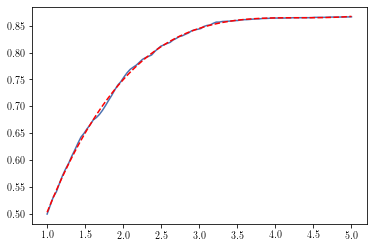

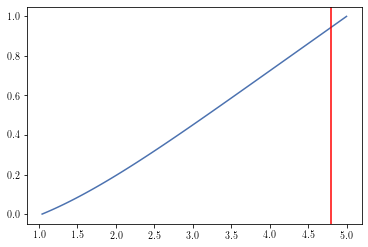

4.7979797979797985


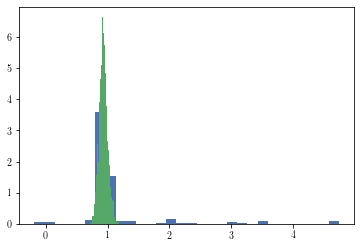

In [68]:
flat_raw = nu0.reshape(-1)
mad_v = mad(flat_raw)
median_v = np.median(flat_raw)

num = []
mul = np.linspace(1, 5, 100)
total = len(flat_raw)
for i in tqdm(mul):
    mask = np.abs(flat_raw - median_v) < i*mad_v
    num.append(len(flat_raw[mask]))
num = np.array(num)
ydif = np.diff(num)/total
ydif /= ydif[0]
# plot
plt.plot(mul, num/total)
# fit polinomial polyvit
p = np.polyfit(mul, num/total, 4)
plt.plot(mul, np.polyval(p, mul), '--', c='r')
plt.show()

y = np.polyval(p, mul)
areas = []
for i in range(len(y)-1):
    areas.append(simps(y[:i+1], mul[:i+1]))
areas = np.array(areas)
max_areas = areas.max()
areas /= max_areas
# find the value of mul that gives the 95% of the area
m95 = mul[np.argmin(np.abs(areas - 0.95))]
# plot areas
plt.plot(mul[1:], areas)
plt.axvline(m95, c='r')
plt.show()
print(m95)

mask = np.abs(flat_raw - median_v) < m95*mad_v
flat = flat_raw[mask]
plt.hist(flat_raw, bins=30, density=True)
plt.hist(flat, bins=30, density=True)
plt.show()

#### 4. R

this is trivial, because we already have the reference values

#### 5. zsun

100%|██████████| 100/100 [00:00<00:00, 7612.31it/s]


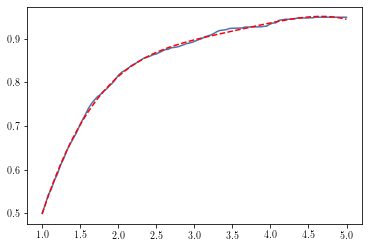

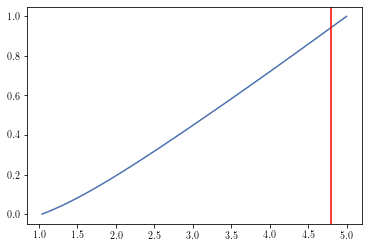

4.7979797979797985


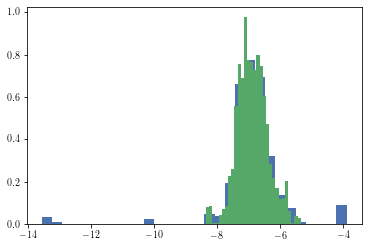

In [69]:
flat_raw = w0.reshape(-1)
mad_v = mad(flat_raw)
median_v = np.median(flat_raw)

num = []
mul = np.linspace(1, 5, 100)
total = len(flat_raw)
for i in tqdm(mul):
    mask = np.abs(flat_raw - median_v) < i*mad_v
    num.append(len(flat_raw[mask]))
num = np.array(num)
ydif = np.diff(num)/total
ydif /= ydif[0]
# plot
plt.plot(mul, num/total)
# fit polinomial polyvit
p = np.polyfit(mul, num/total, 4)
plt.plot(mul, np.polyval(p, mul), '--', c='r')
plt.show()

y = np.polyval(p, mul)
areas = []
for i in range(len(y)-1):
    areas.append(simps(y[:i+1], mul[:i+1]))
areas = np.array(areas)
max_areas = areas.max()
areas /= max_areas
# find the value of mul that gives the 95% of the area
m95 = mul[np.argmin(np.abs(areas - 0.95))]
# plot areas
plt.plot(mul[1:], areas)
plt.axvline(m95, c='r')
plt.show()
print(m95)

mask = np.abs(flat_raw - median_v) < m95*mad_v
flat = flat_raw[mask]
plt.hist(flat_raw, bins=30, density=True)
plt.hist(flat, bins=30, density=True)
plt.show()

#### 5. log_sigmaw1

100%|██████████| 100/100 [00:00<00:00, 6195.52it/s]


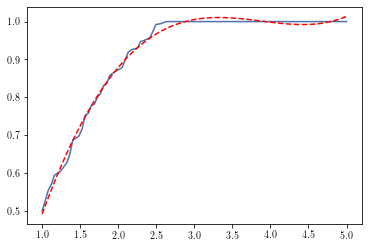

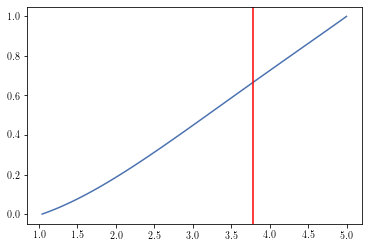

3.787878787878788


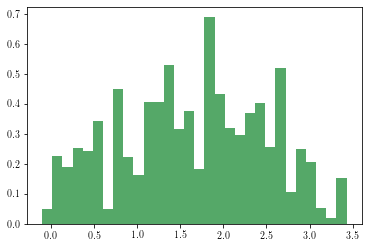

In [92]:
flat_raw = log_sigmaw1.reshape(-1)
mad_v = mad(flat_raw)
median_v = np.median(flat_raw)

num = []
mul = np.linspace(1, 5, 100)
total = len(flat_raw)
for i in tqdm(mul):
    mask = np.abs(flat_raw - median_v) < i*mad_v
    num.append(len(flat_raw[mask]))
num = np.array(num)
ydif = np.diff(num)/total
ydif /= ydif[0]
# plot
plt.plot(mul, num/total)
# fit polinomial polyvit
p = np.polyfit(mul, num/total, 4)
plt.plot(mul, np.polyval(p, mul), '--', c='r')
plt.show()

y = np.polyval(p, mul)
areas = []
for i in range(len(y)-1):
    areas.append(simps(y[:i+1], mul[:i+1]))
areas = np.array(areas)
max_areas = areas.max()
areas /= max_areas
# find the value of mul that gives the 95% of the area
m95 = mul[np.argmin(np.abs(areas - 0.68))]
# plot areas
plt.plot(mul[1:], areas)
plt.axvline(m95, c='r')
plt.show()
print(m95)

mask = np.abs(flat_raw - median_v) < m95*mad_v
flat = flat_raw[mask]
plt.hist(flat_raw, bins=30, density=True)
plt.hist(flat, bins=30, density=True)
plt.show()

#### 6. log_a1

100%|██████████| 100/100 [00:00<00:00, 5125.19it/s]


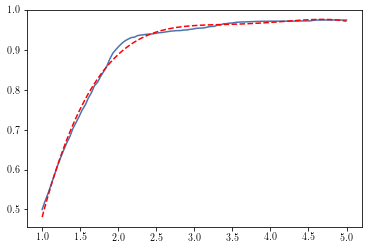

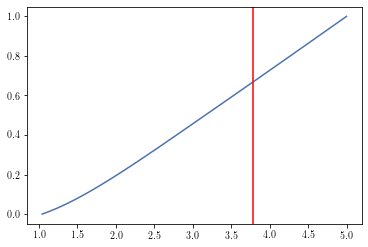

3.787878787878788


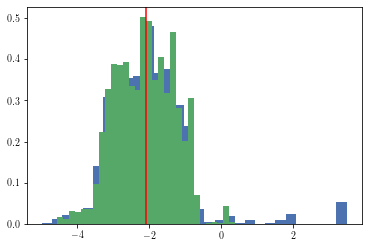

In [71]:
flat_raw = log_a1.reshape(-1)
mad_v = mad(flat_raw)
median_v = np.median(flat_raw)

num = []
mul = np.linspace(1, 5, 100)
total = len(flat_raw)
for i in tqdm(mul):
    mask = np.abs(flat_raw - median_v) < i*mad_v
    num.append(len(flat_raw[mask]))
num = np.array(num)
ydif = np.diff(num)/total
ydif /= ydif[0]
# plot
plt.plot(mul, num/total)
# fit polinomial polyvit
p = np.polyfit(mul, num/total, 4)
plt.plot(mul, np.polyval(p, mul), '--', c='r')
plt.show()

y = np.polyval(p, mul)
areas = []
for i in range(len(y)-1):
    areas.append(simps(y[:i+1], mul[:i+1]))
areas = np.array(areas)
max_areas = areas.max()
areas /= max_areas
# find the value of mul that gives the 95% of the area
m95 = mul[np.argmin(np.abs(areas - 0.68))]
# plot areas
plt.plot(mul[1:], areas)
plt.axvline(m95, c='r')
plt.show()
print(m95)

mask = np.abs(flat_raw - median_v) < m95*mad_v
flat = flat_raw[mask]
plt.hist(flat_raw, bins=30, density=True)
plt.hist(flat, bins=30, density=True)
plt.axvline(np.median(flat_raw), c='r')
plt.show()

#### 7. log_sigmaw2

100%|██████████| 100/100 [00:00<00:00, 7066.71it/s]


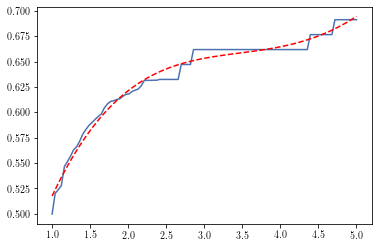

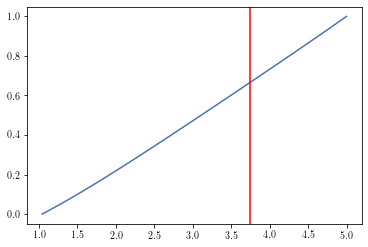

3.747474747474748


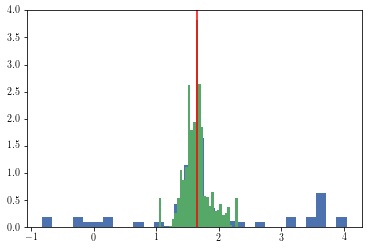

In [100]:
flat_raw = log_sigmaw2.reshape(-1)
mad_v = mad(flat_raw)
median_v = np.median(flat_raw)

num = []
mul = np.linspace(1, 5, 100)
total = len(flat_raw)
for i in tqdm(mul):
    mask = np.abs(flat_raw - median_v) < i*mad_v
    num.append(len(flat_raw[mask]))
num = np.array(num)
ydif = np.diff(num)/total
ydif /= ydif[0]
# plot
plt.plot(mul, num/total)
# fit polinomial polyvit
p = np.polyfit(mul, num/total, 4)
plt.plot(mul, np.polyval(p, mul), '--', c='r')
plt.show()

y = np.polyval(p, mul)
areas = []
for i in range(len(y)-1):
    areas.append(simps(y[:i+1], mul[:i+1]))
areas = np.array(areas)
max_areas = areas.max()
areas /= max_areas
# find the value of mul that gives the 95% of the area
m95 = mul[np.argmin(np.abs(areas - 0.68))]
# plot areas
plt.plot(mul[1:], areas)
plt.axvline(m95, c='r')
plt.show()
print(m95)

mask = np.abs(flat_raw - median_v) < m95*mad_v
flat = flat_raw[mask]
plt.hist(flat_raw, bins=30, density=True)
plt.hist(flat, bins=30, density=True)
plt.axvline(np.median(flat_raw), c='r')
plt.show()

#### 6. log_a2
same

100%|██████████| 100/100 [00:00<00:00, 6914.56it/s]


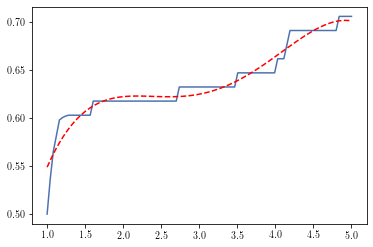

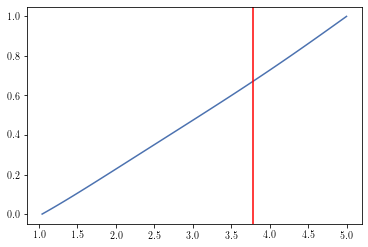

3.787878787878788


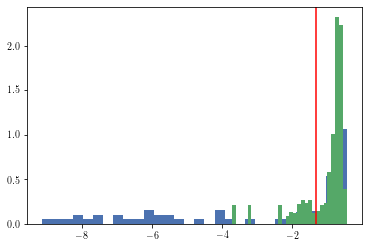

In [99]:
flat_raw = log_a2.reshape(-1)
mad_v = mad(flat_raw)
median_v = np.median(flat_raw)

num = []
mul = np.linspace(1, 5, 100)
total = len(flat_raw)
for i in tqdm(mul):
    mask = np.abs(flat_raw - median_v) < i*mad_v
    num.append(len(flat_raw[mask]))
num = np.array(num)
ydif = np.diff(num)/total
ydif /= ydif[0]
# plot
plt.plot(mul, num/total)
# fit polinomial polyvit
p = np.polyfit(mul, num/total, 4)
plt.plot(mul, np.polyval(p, mul), '--', c='r')
plt.show()

y = np.polyval(p, mul)
areas = []
for i in range(len(y)-1):
    areas.append(simps(y[:i+1], mul[:i+1]))
areas = np.array(areas)
max_areas = areas.max()
areas /= max_areas
# find the value of mul that gives the 95% of the area
m95 = mul[np.argmin(np.abs(areas - 0.68))]
# plot areas
plt.plot(mul[1:], areas)
plt.axvline(m95, c='r')
plt.show()
print(m95)

mask = np.abs(flat_raw - median_v) < m95*mad_v
flat = flat_raw[mask]
plt.hist(flat_raw, bins=30, density=True)
plt.hist(flat, bins=30, density=True)
plt.axvline(np.median(flat_raw), c='r')
plt.show()

### Conclusion

use `mad` to constrain the parameters space

In [21]:
def get_mul(flat_raw, level=0.95):
    mad_v = mad(flat_raw)
    median_v = np.median(flat_raw)

    num = []
    mul = np.linspace(1, 5, 50)
    total = len(flat_raw)
    for i in mul:
        mask = np.abs(flat_raw - median_v) < i*mad_v
        num.append(len(flat_raw[mask]))
    num = np.array(num)
    p = np.polyfit(mul, num/total, 4)
    y = np.polyval(p, mul)
    areas = []
    for i in range(len(y)-1):
        areas.append(simps(y[:i+1], mul[:i+1]))
    areas = np.array(areas)
    max_areas = areas.max()
    areas /= max_areas
    # find the value of mul that gives the 95% of the area
    m = mul[np.argmin(np.abs(areas - level))]
    return m

In [34]:
locs = dict(
    rhoDM=-0.05,
    log_nu0=-5,
    R=3.4E-3,
    zsun=-50,
    w0=-15,
    log_sigmaw1=-3,
    log_a1=-5,
    log_sigmaw2=1,
    log_a2=-5,
)

scales = dict(
    rhoDM=0.15,
    log_nu0=15,
    R=0.6E-3,
    zsun=100,
    w0=15,
    log_sigmaw1=8,
    log_a1=10,
    log_sigmaw2=1.5,
    log_a2=10
)
# locs = np.array(list(locs.values()))
# scales = np.array(list(scales.values()))

In [35]:
res = {
    'rhoDM': rhoDM,
    'log_nu0': nu0,
    'zsun': zsun,
    'w0': w0,
    'log_sigmaw1': log_sigmaw1,
    'log_a1': log_a1,
    'log_sigmaw2': log_sigmaw2,
    'log_a2': log_a2,
}

for k, v in res.items():
    flat_raw = v.reshape(-1)
    mad_v = mad(flat_raw)
    median_v = np.median(flat_raw)
    m = get_mul(flat_raw, 0.90) if k in [
                "log_sigmaw1", "log_sigmaw2", "log_a1", "log_a2"] else get_mul(flat_raw)
    low = median_v - m*mad_v
    delta = 2*m*mad_v
    locs[k] = low
    scales[k] = delta

keys = list(locs.keys())
locs = np.array(list(locs.values()))
scales = np.array(list(scales.values()))

[(k, loc, th, s+loc) for k, loc, th, s in zip(keys, locs, theta[24:], scales)]

[('rhoDM', -4.241810185548653, 0.016, 2.530896016278473),
 ('log_nu0', 0.7652291962697186, 0.7, 1.1049396633716082),
 ('R', 0.0034, 0.0034, 0.004),
 ('zsun', -2.2351133584438916, 5.0, 22.349228381152273),
 ('w0', -8.01999061709918, -7.0, -5.7580205427140445),
 ('log_sigmaw1', -0.7388926262855322, 1.6094379124341003, 4.818301713742425),
 ('log_a1', -5.535219488093805, -0.2231435513142097, 0.35142204231426355),
 ('log_sigmaw2', 1.3080230122544734, 2.302585092994046, 1.896991037312751),
 ('log_a2', -1.187937059036336, -1.6094379124341003, -0.3002449946672502)]

In [36]:
t0 = time()
chain = dm.mcmc(1000, nwalkers, p0, zdata, wdata, locs, scales, dz=1, verbose=True, parallel=True)
print(time() - t0, "s")
chain.shape

7.1878297328948975 s


(1000, 68, 33)

(500, 68, 10)


100%|██████████| 10/10 [00:00<00:00, 43.70it/s]


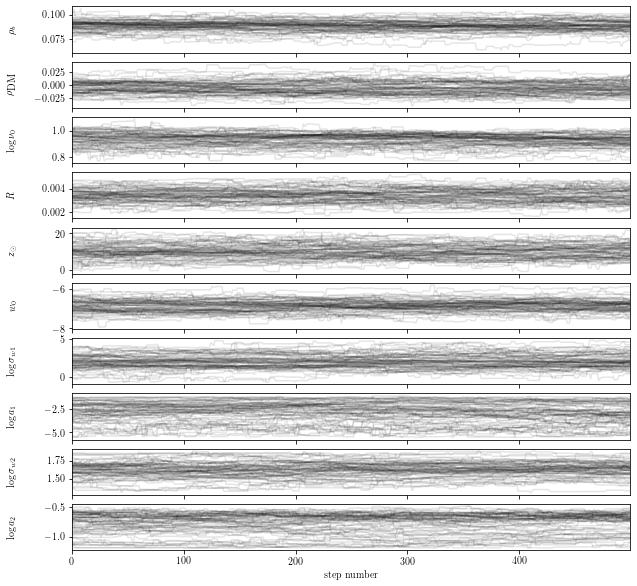

In [37]:
burn = 500
# burn = 200
rhob = chain[burn:, :, :12].sum(axis=2).T
rhoDM = chain[burn:, :, 24].T
nu0 = chain[burn:, :, 25].T
R = chain[burn:, :, 26].T
zsun = chain[burn:, :, 27].T
w0 = chain[burn:, :, 28].T
log_sigmaw1 = chain[burn:, :, 29].T
log_a1 = chain[burn:, :, 30].T
log_sigmaw2 = chain[burn:, :, 31].T
log_a2 = chain[burn:, :, 32].T

params = np.array([rhob, rhoDM, nu0, R, zsun, w0, log_sigmaw1, log_a1, log_sigmaw2, log_a2]).T
print(params.shape)
labels = [r'$\rho_b$',r'$\rho_{\textup{DM}}$', r'$\log \nu_0$', r'$R$', r'$z_{\odot}$', r'$w_0$', r'$\log \sigma_{w1}$', r'$\log a_1$', r'$\log \sigma_{w2}$', r'$\log a_2$']
plot_chain(params, labels, figsize=(10,10))

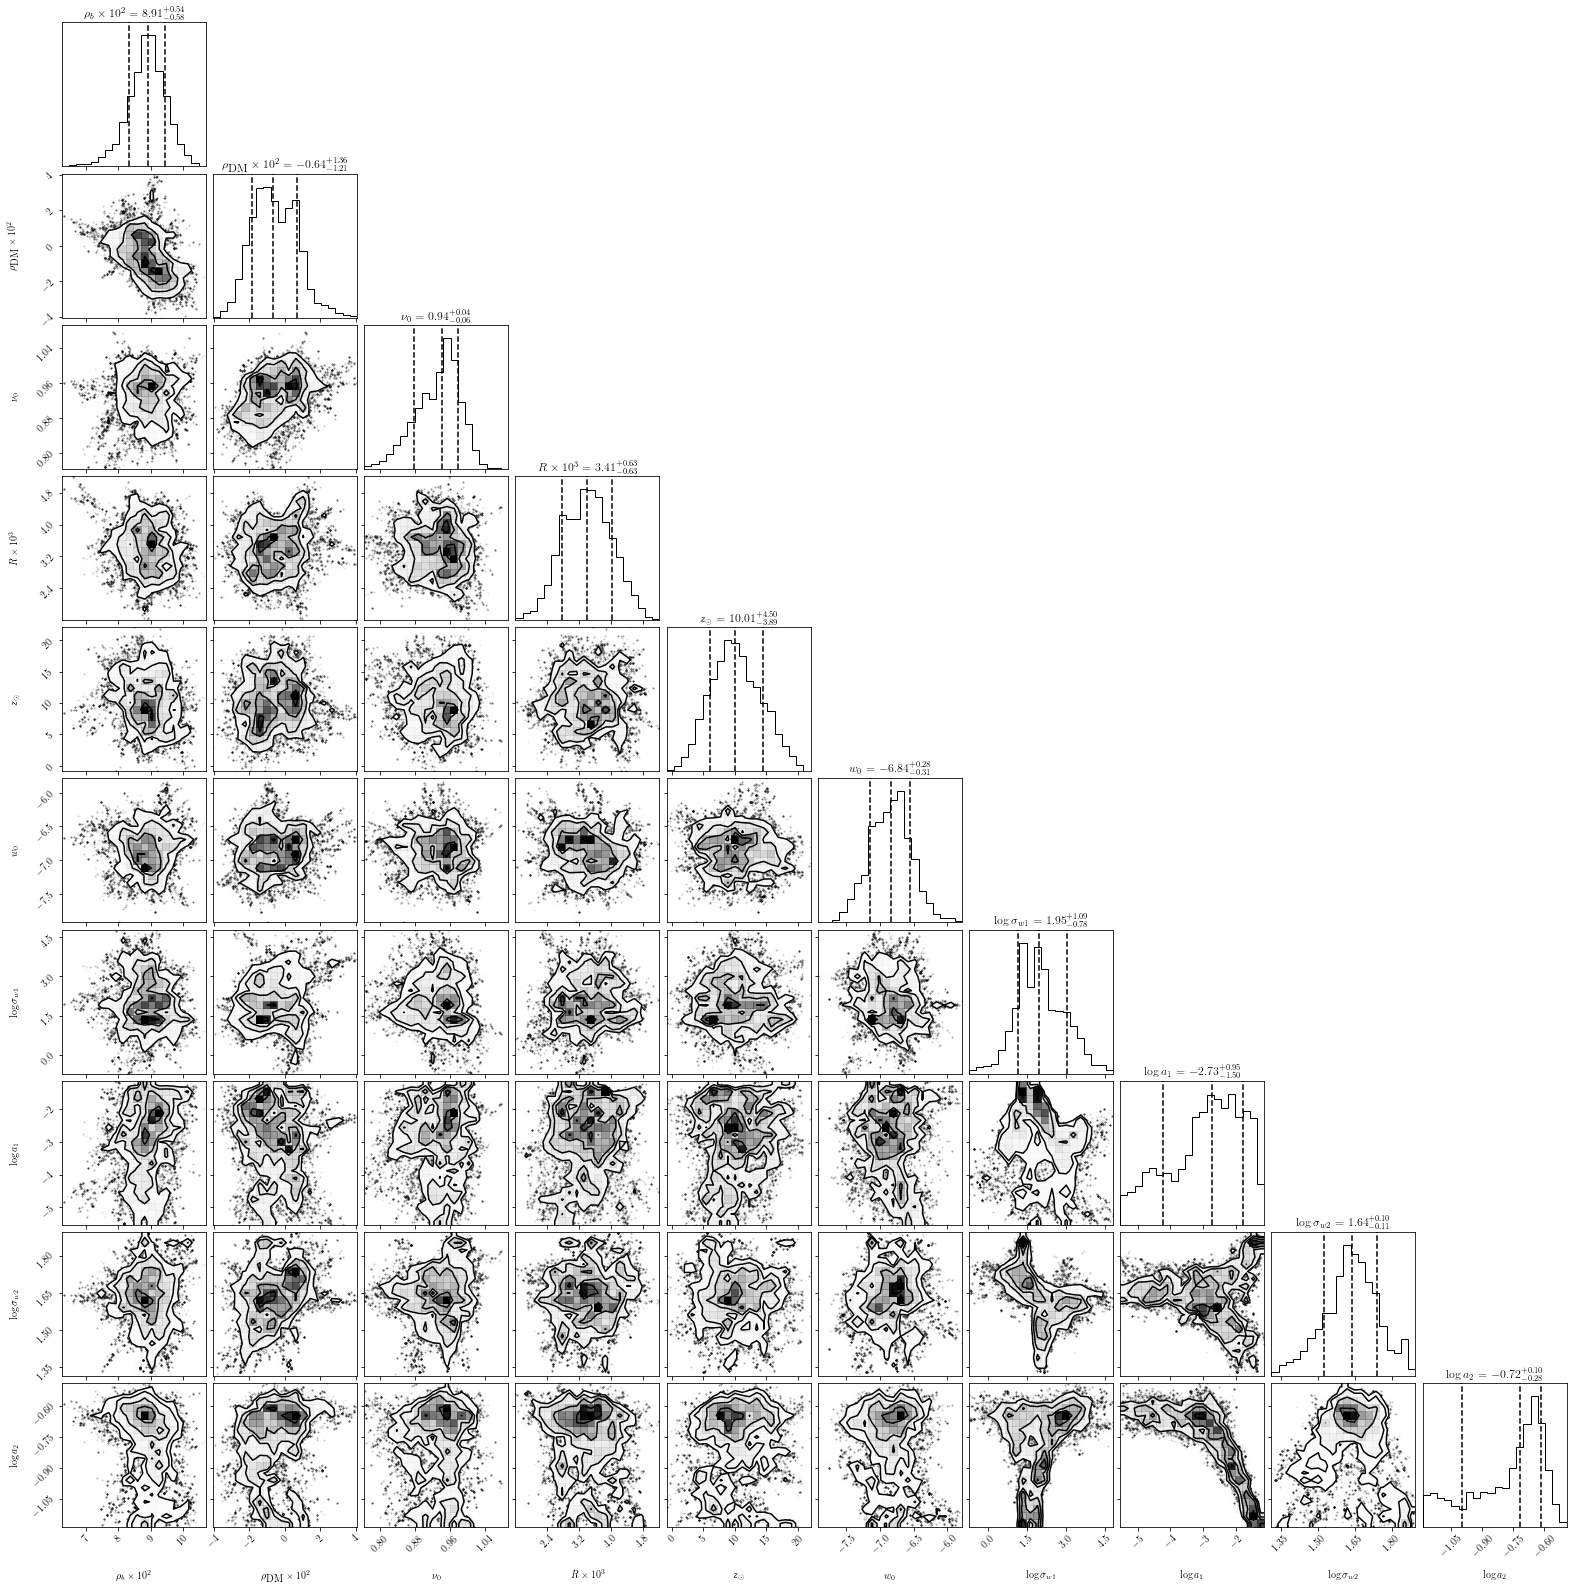

In [38]:
rhob = chain[burn:, :, :12].sum(axis=2).T/1E-2
rhoDM = chain[burn:, :, 24].T/1E-2
nu0 = chain[burn:, :, 25].T
R = chain[burn:, :, 26].T/1E-3
zsun = chain[burn:, :, 27].T
w0 = chain[burn:, :, 28].T
log_sigmaw1 = chain[burn:, :, 29].T
log_a1 = chain[burn:, :, 30].T
log_sigmaw2 = chain[burn:, :, 31].T
log_a2 = chain[burn:, :, 32].T

params = np.array([rhob, rhoDM, nu0, R, zsun, w0, log_sigmaw1, log_a1, log_sigmaw2, log_a2]).T

labels = [r'$\rho_b\times 10^2$', r'$\rho_{\textup{DM}}\times 10^2$', r'$\nu_0$', r'$R\times 10^3$', r'$z_{\odot}$', r'$w_0$', r'$\log \sigma_{w1}$', r'$\log a_1$', r'$\log \sigma_{w2}$', r'$\log a_2$']
plot_corner(params, labels)

# Script

do mcmc for

* same $N$, different $z$
* same $z$, different $N$

Each 'running' contains
1. generate_init: initial position for walkers.
    * this is done by the experiment above.
2. run_mcmc: run true mcmc for 10_000 steps.
3. plot trace: plot trace plot for preliminary mcmc.
4. plot corner: plot corner plot for the long run.
5. plot fit: fitting plot for vertical density and vertical dispersion.
6. calculate bic & aic: calculate bic and aic for the long run.

All of these functionalities are implemented in `mcmc.py` at `utils`.

Just run the `program.py` at `script`.
To automate the process for all data, run `run_program.py` at `script`.